# La Chioma 2024: Accessing Behavioral and Ephys Data in NWB Format

This notebook showcases one example session from the Alessandro La Chioma dataset containing behavior and concurrent OpenEphys recordings in auditory cortex.

Contents:
- [Reading NWBFile locally](#read-nwb)
- [Access Subject Metadata](#access-subject)
- [Access Experiment Intervals](#access-experiments)
- [Access Behavioral Time Series (Wheel Data)](#access-wheel)
- [Access Sound Events](#access-sound)
- [Access Stimulus Data](#access-stimulus)


# Select the subject and session to load

In [3]:
subject_id = "AL240404c"
session_id = "2024-04-22"

# Reading an NWB file locally <a id="read-nwb"></a>

This section demonstrates how to read an NWB file using `pynwb`.

Based on the [NWB File Basics](https://pynwb.readthedocs.io/en/stable/tutorials/general/plot_file.html#sphx-glr-tutorials-general-plot-file-py) tutorial from [PyNWB](https://pynwb.readthedocs.io/en/stable/#).

An [NWBFile](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.NWBFile) represents a single session of an experiment. Each NWBFile must have a `session description`, `identifier`, and `session start time`.

Reading is carried out using the [NWBHDF5IO](https://pynwb.readthedocs.io/en/stable/pynwb.html#pynwb.NWBHDF5IO) class. To read the NWB file use the read mode ("r") to retrieve an NWBFile object.

In [5]:
from pathlib import Path
from pynwb import NWBHDF5IO

directory = Path("/Users/weian/data/nwbfiles")
nwbfile_path = directory / f"sub-{subject_id}_ses-{session_id}.nwb"
io = NWBHDF5IO(path=nwbfile_path, load_namespaces=True)
nwbfile = io.read()

Importantly, the `session start time` is the reference time for all timestamps in the file. For instance, an event with a timestamp of 0 in the file means the event occurred exactly at the session start time.

The `session_start_time` is extracted from the Open Ephys data.


In [6]:
nwbfile.session_start_time

datetime.datetime(2024, 4, 22, 17, 45, 19, tzinfo=tzoffset(None, -14400))

# Access Subject Metadata <a id="access-subject"></a>

The subject metadata is stored in the NWB file as `nwbfile.subject`.

In [7]:
nwbfile.subject

subject pynwb.file.Subject at 0x4661801328
Fields:
  age: P12W
  age__reference: birth
  description: Female wild-type (C57BL/6) mice were used for all experiments.
10 weeks old at the time of at headbar implantation, 11 weeks at beginning of training, 12 weeks at ephys recording.

  sex: F
  species: Mus musculus
  strain: C57BL/6J
  subject_id: AL240404c

# Access Experiment Intervals <a id="access-experiments"></a>

Experiment intervals are stored in `nwbfile.intervals` and can be converted to a `pandas.DataFrame` for easier exploration:



In [8]:
experiments_table = nwbfile.intervals["experiments"]
experiments_table = experiments_table.to_dataframe()
experiments_table

,start_time,stop_time,radius_wheel_cm,experiment_id,virmen_mode_id,tags,timeseries
id,,,,,,,
0,85.198508,85.561424,3.85,1,1,[Virmen Closed Loop],"[(0, 12, speed_rpm_1 pynwb.base.TimeSeries at ..."
1,85.596503,196.754869,3.85,1,5,[Virmen Closed Loop],"[(13, 5205, speed_rpm_1 pynwb.base.TimeSeries ..."
2,196.787088,618.022062,3.85,1,1,[Virmen Closed Loop],"[(5219, 19529, speed_rpm_1 pynwb.base.TimeSeri..."
3,618.062497,1208.027063,3.85,1,2,[Virmen Closed Loop],"[(24749, 27354, speed_rpm_1 pynwb.base.TimeSer..."
4,1208.055417,1946.627985,3.85,1,3,[Virmen Closed Loop],"[(52104, 34053, speed_rpm_1 pynwb.base.TimeSer..."
5,1946.647001,2694.159585,3.85,1,4,[Virmen Closed Loop],"[(86158, 34540, speed_rpm_1 pynwb.base.TimeSer..."
6,2694.196456,3215.459321,3.85,1,5,[Virmen Closed Loop],"[(120699, 24192, speed_rpm_1 pynwb.base.TimeSe..."
7,3435.219507,4176.601736,3.85,2,4,[Virmen Open Loop],"[(0, 33928, speed_rpm_2 pynwb.base.TimeSeries ..."
8,4252.619491,4801.525369,3.85,3,5,[Virmen Open Loop],"[(0, 25165, speed_rpm_3 pynwb.base.TimeSeries ..."


# Access Behavioral Time Series (Wheel Data) <a id="access-wheel"></a>

Behavioral time series (e.g., wheel position, velocity) are stored in the processing module under `behavior` as `BehavioralTimeSeries` objects.

In [9]:
behavior_module = nwbfile.processing["behavior"]
# The behavioral time series for the first experiment
behavioral_time_series = behavior_module["behavioral_time_series_1"]
behavioral_time_series.time_series

{'position_rotary_encoder_1': position_rotary_encoder_1 pynwb.base.TimeSeries at 0x6122936448
 Fields:
   comments: no comments
   conversion: 1.0
   data: <HDF5 dataset "data": shape (144892,), type "<f8">
   description: The position of the mouse wheel in units of rotary encoder.
   interval: 1
   offset: 0.0
   resolution: -1.0
   timestamps: <HDF5 dataset "timestamps": shape (144892,), type "<f8">
   timestamps_unit: seconds
   unit: a.u.,
 'speed_cm_s_1': speed_cm_s_1 pynwb.base.TimeSeries at 0x6122941200
 Fields:
   comments: no comments
   conversion: 1.0
   data: <HDF5 dataset "data": shape (144892,), type "<f8">
   description: The speed of the mouse wheel in centimeters per second.
   interval: 1
   offset: 0.0
   resolution: -1.0
   timestamps: <HDF5 dataset "timestamps": shape (144892,), type "<f8">
   timestamps_unit: seconds
   unit: cm/s,
 'speed_rpm_1': speed_rpm_1 pynwb.base.TimeSeries at 0x6118711728
 Fields:
   comments: no comments
   conversion: 1.0
   data: <HDF5 

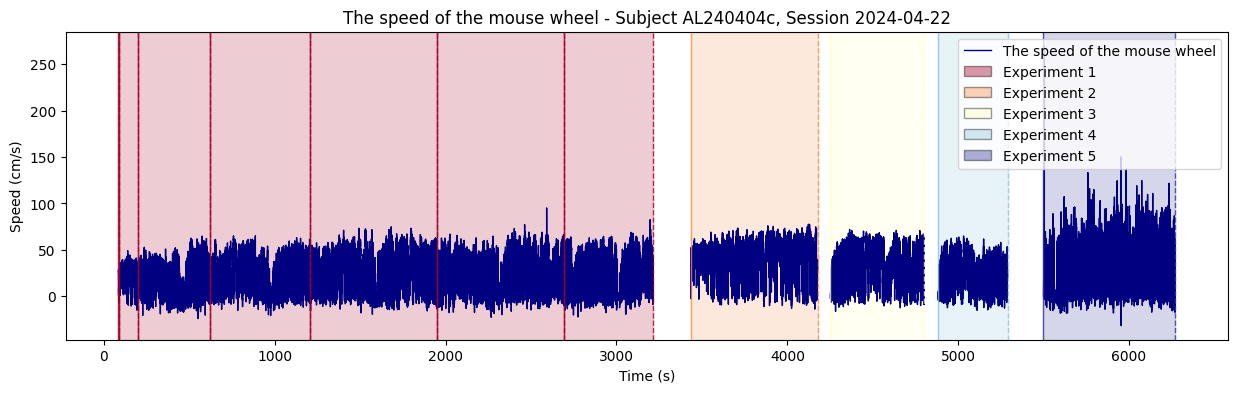

In [57]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

fig, ax = plt.subplots(figsize=(15, 4))

# Plot all speed time series with unique labels
behavioral_time_series_names = [data_interface_name for data_interface_name in behavior_module.data_interfaces if "behavioral_time_series" in data_interface_name]
for i, behavioral_time_series_name in enumerate(behavioral_time_series_names):
    speed = behavior_module.get(behavioral_time_series_name).time_series[f"speed_cm_s_{i+1}"]
    ax.plot(speed.timestamps[:], speed.data[:], color="navy", linewidth=1, label="The speed of the mouse wheel")

# Get unique experiment_ids and assign a color to each
experiment_ids = experiments_table["experiment_id"].unique()
cmap = plt.get_cmap('RdYlBu', len(experiment_ids))
color_map = {eid: cmap(i) for i, eid in enumerate(experiment_ids)}

# Draw trial borders and shaded intervals with unique colors
for eid in experiment_ids:
    rows = experiments_table[experiments_table["experiment_id"] == eid]
    color = color_map[eid]
    for _, row in rows.iterrows():
        ax.axvspan(row['start_time'], row['stop_time'], color=color, alpha=0.2)
        ax.axvline(x=row['start_time'], color=color, linestyle='-', alpha=0.8, linewidth=1)
        ax.axvline(x=row['stop_time'], color=color, linestyle='--', alpha=0.8, linewidth=1)

# Create custom legend handles for each experiment_id
legend_handles = [Patch(facecolor=color_map[eid], edgecolor='k', alpha=0.4, label=f'Experiment {eid}') for eid in experiment_ids]
# Combine speed and experiment handles
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=[ax.lines[0]] + legend_handles, loc='upper right')
ax.set_xlabel("Time (s)")
ax.set_ylabel("Speed (cm/s)")
ax.set_title(f"The speed of the mouse wheel - Subject {subject_id}, Session {session_id}")

plt.show()

# Access Sound Events <a id="access-sound"></a>

Sound events are stored as an AnnotatedEventsTable in the `behavior` processing module, under the name `sound_events`.
These events can be converted to a `pandas.DataFrame` for easier exploration:

In [85]:
sound_events = behavior_module.get("sound_events")
sound_events.to_dataframe()

,experiment_id,is_invalid,context_id,virmen_mode,virmen_mode_id,speed_cm_s,event_times,label,event_description
id,,,,,,,,,
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[False, False, False, False, False, False, Fal...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[7.795058737979263, 10.92331994776082, 6.07362...","[87.23377682493302, 88.12708702135374, 88.5110...",1,The event times for sound 1.
1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[False, False, False, False, False, False, Fal...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...","[18.872923536520673, 22.35117303011658, 28.361...","[1949.021602642483, 1955.656228371424, 1956.08...",2,The event times for sound 2.
2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[False, True, False, False, False, False, Fals...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[7.207672945809434, 20.72847609274526, 4.30684...","[204.03283499267678, 204.34481355366233, 204.6...",3,The event times for sound 3.
3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[False, False, False, False, True, False, Fals...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...","[16.33329973547388, 19.49937331693823, 20.1098...","[1946.9443039317812, 1948.466946311525, 1951.2...",4,The event times for sound 4.
4,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[False, False, False, False, False, False, Fal...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[25.755483729629848, 10.9355385199679, 20.9003...","[196.91822878514262, 197.16620661561103, 197.4...",5,The event times for sound 5.
5,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[False, False, False, False, False, False, Fal...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...","[7.766006230427396, 15.558118463957886, 21.882...","[1947.2802827667106, 1950.2375915220227, 1951....",6,The event times for sound 6.
6,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[True, True, True, True, True, True, True, Tru...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[46.297296673082506, 10.844633011105905, 20.93...","[5504.275033014181, 5523.573528291055, 5526.59...",7,The event times for sound 7.


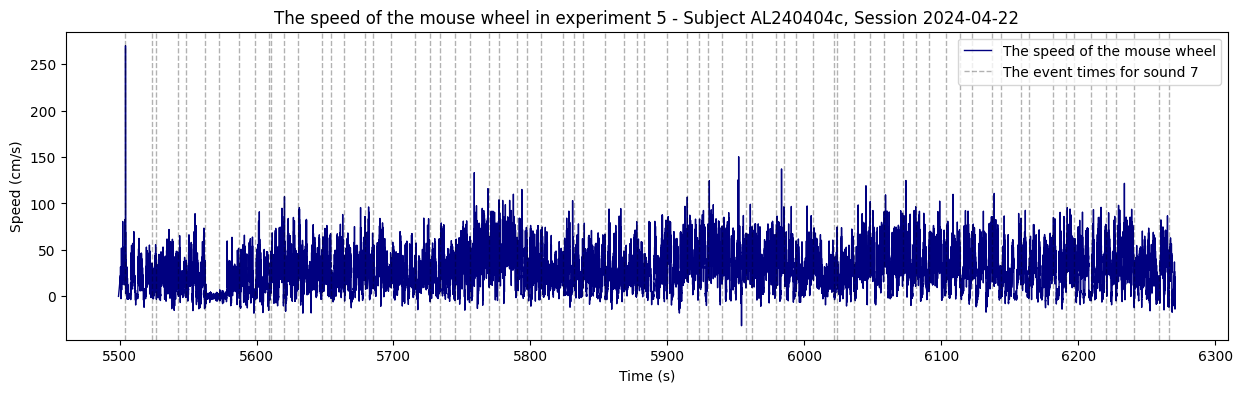

In [70]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

fig, ax = plt.subplots(figsize=(15, 4))

speed = behavior_module.get("behavioral_time_series_5").time_series["speed_cm_s_5"]
ax.plot(speed.timestamps[:], speed.data[:], color="navy", linewidth=1, label="The speed of the mouse wheel")

for i, sound_event in enumerate(sound_events["event_times"][-1]):
    label = "The event times for sound 7" if i == 0 else None
    ax.axvline(x=sound_event, color="black", linestyle='--', alpha=0.3, linewidth=1, label=label)

ax.legend()
ax.set_xlabel("Time (s)")
ax.set_ylabel("Speed (cm/s)")
ax.set_title(f"The speed of the mouse wheel in experiment 5 - Subject {subject_id}, Session {session_id}")

plt.show()

# Access Stimulus Data (Tones) <a id="access-stimulus"></a>

Stimulus data (tones) are stored in the `stimulus` group. Each tone is a `TimeSeries` object.

In [73]:
nwbfile.stimulus

{'tone_F0000_L0_D0.025+0.005': tone_F0000_L0_D0.025+0.005 pynwb.base.TimeSeries at 0x6122942592
 Fields:
   comments: no comments
   conversion: 1.0
   data: <HDF5 dataset "data": shape (6739,), type "<f8">
   description: The audio data generated by PlayWaves.
   offset: 0.0
   rate: nan
   resolution: -1.0
   starting_time: 5507.5096699349715
   starting_time_unit: seconds
   unit: a.u.,
 'tone_F10023_L75_D0.025+0.005': tone_F10023_L75_D0.025+0.005 pynwb.base.TimeSeries at 0x6122945520
 Fields:
   comments: no comments
   conversion: 1.0
   data: <HDF5 dataset "data": shape (6739,), type "<f8">
   description: The audio data generated by PlayWaves.
   offset: 0.0
   rate: nan
   resolution: -1.0
   starting_time: 5511.541640956693
   starting_time_unit: seconds
   unit: a.u.,
 'tone_F14023_L75_D0.025+0.005': tone_F14023_L75_D0.025+0.005 pynwb.base.TimeSeries at 0x6122936256
 Fields:
   comments: no comments
   conversion: 1.0
   data: <HDF5 dataset "data": shape (6739,), type "<f8">


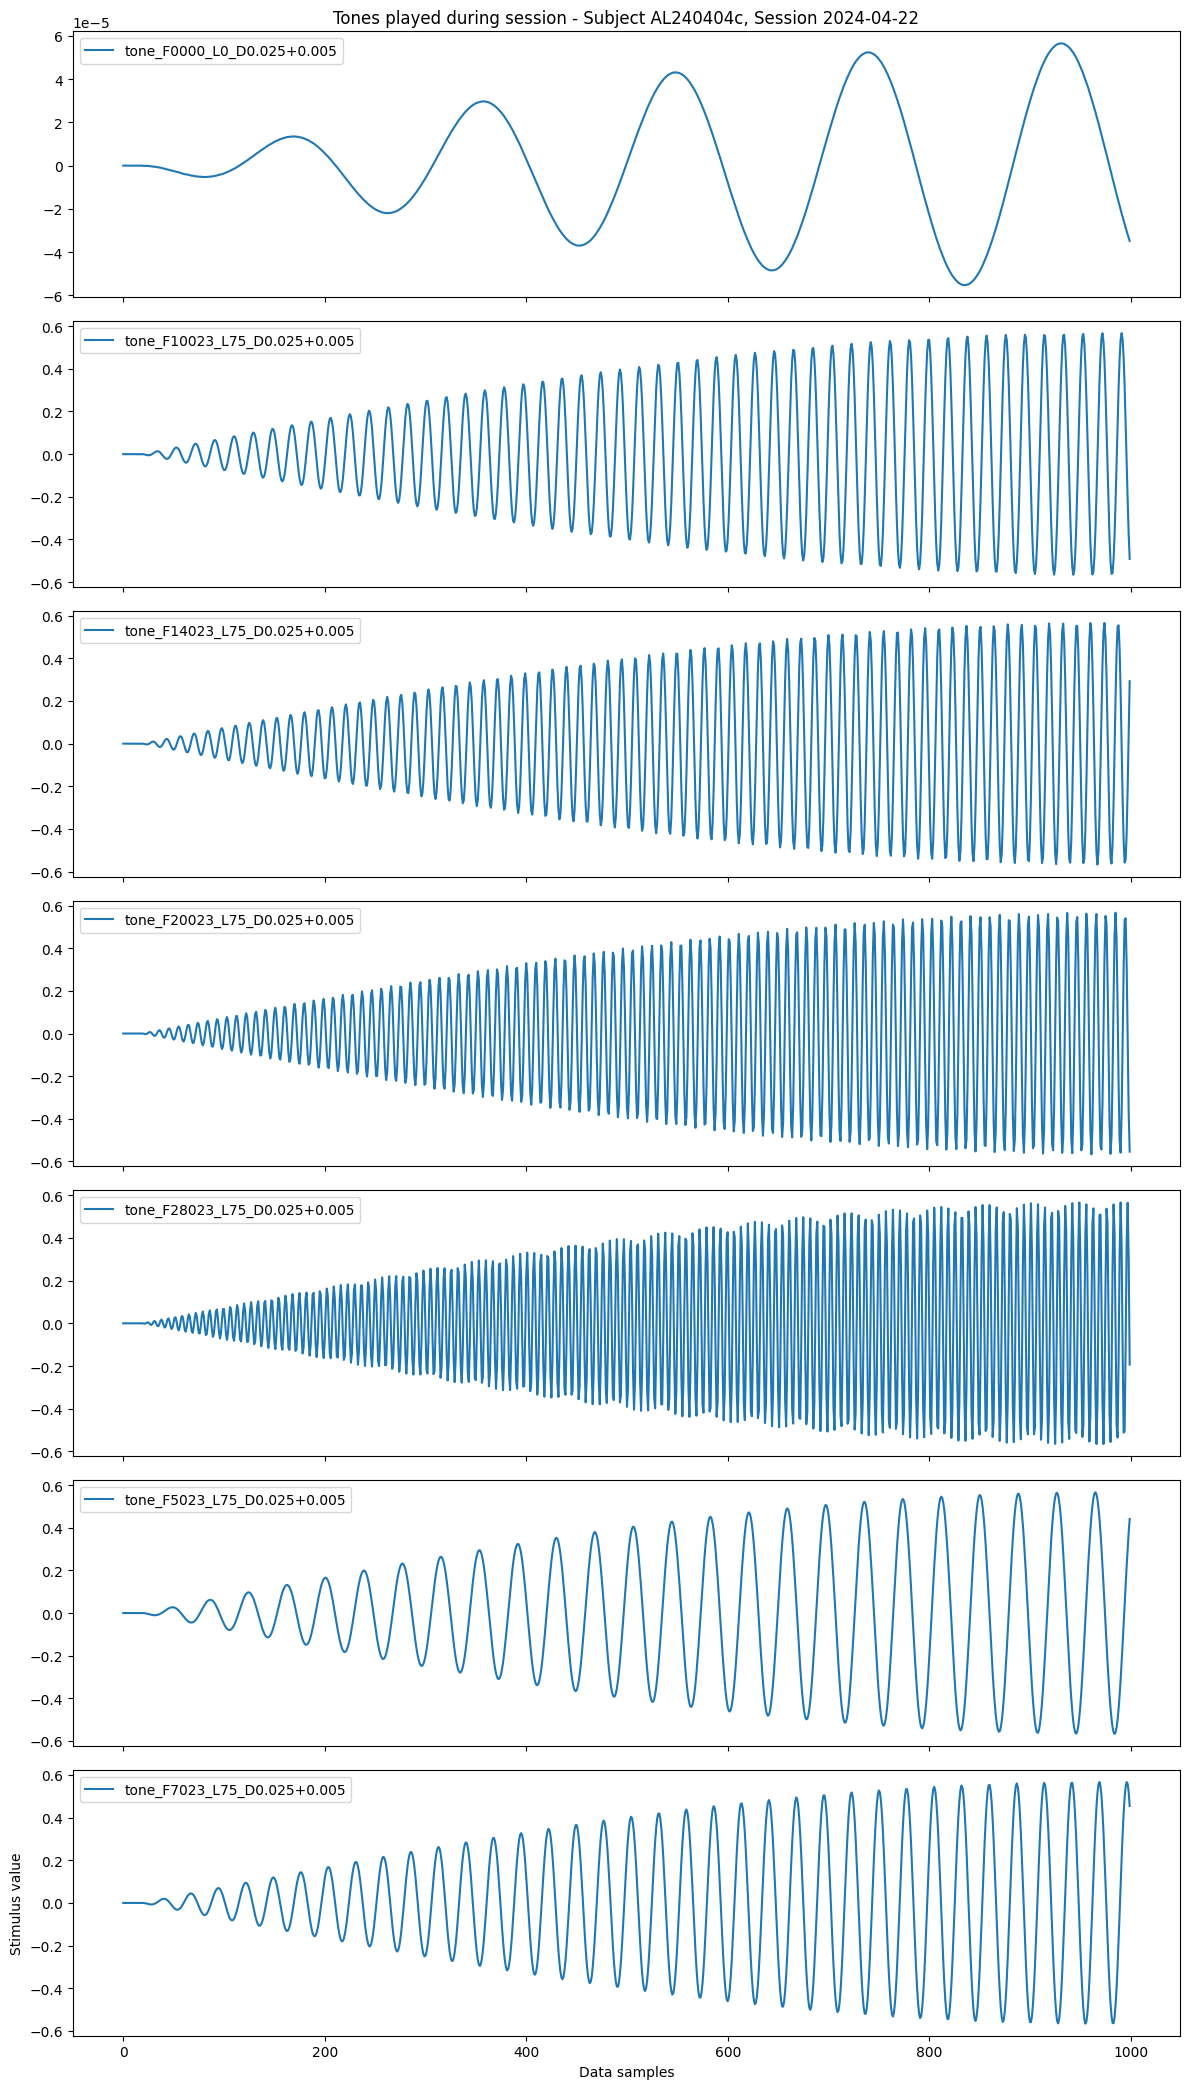

In [83]:
import matplotlib.pyplot as plt


n_stimuli = len(nwbfile.stimulus)
fig, axes = plt.subplots(n_stimuli, 1, figsize=(12, 3 * n_stimuli), sharex=True)

for ax, (name, ts) in zip(axes, nwbfile.stimulus.items()):
    # Plot the stimulus data
    ax.plot(ts.data[:1000], label=name)
    ax.legend()

ax.set_xlabel("Data samples") # todo: this should be time
ax.set_ylabel("Stimulus value")
axes[0].set_title(f"Tones played during session - Subject {subject_id}, Session {session_id}")
ax.legend()
plt.tight_layout()
plt.show()